In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [5]:
months=[31,28,31,30,31,30,31,31,30,31,30,31]


## Training set: only 13 values for the building values...
count=0
swiss_train=[]
building_train=[]
for j in range(1,14):
    file_name='data/data'+str(1).zfill(2)+str(j).zfill(2)+'.csv'
    data=pd.read_csv(file_name)
    swiss_train.append(data.apply(lambda x: x['DN']*x['area'],axis=1).sum())
    file_name_building='data_building/data_building'+str(1).zfill(2)+str(j).zfill(2)+'.csv'
    data_building=pd.read_csv(file_name_building)
    building_train.append(data_building.apply(lambda x: x['DN']*x['area'],axis=1).sum())
    count+=1


## Linear regression
X_train=np.array(swiss_train).reshape(-1,1)
y_train=np.array(building_train).reshape(-1,1)
reg = LinearRegression().fit(X_train, y_train)


## Create test set
count=0
swiss_test=[]
for i in range(1,13):
    for j in range(1,months[i-1]+1):
        file_name='data/data'+str(i).zfill(2)+str(j).zfill(2)+'.csv'
        data=pd.read_csv(file_name)
        swiss_test.append(data.apply(lambda x: x['DN']*x['area'],axis=1).sum())
        count+=1


## Getting extrapolation
building_tot=reg.predict(np.array(swiss_test).reshape(-1,1))






C:\Users\mirco\AppData\Local\Temp\ipykernel_16344\1189058158.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Building values","Swiss total value")


Text(0, 0.5, 'Total solar power potential [GWh]')

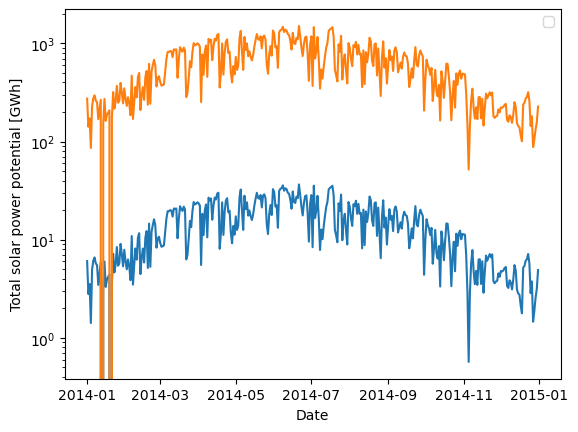

In [6]:

## Plotting results
date_range = pd.date_range(start='1/1/2014', end='31/12/2014', freq='D')
plt.plot(date_range,building_tot/10e9)
plt.plot(date_range,np.array(swiss_test)/10e9)
plt.yscale("log")
plt.legend("Building values","Swiss total value")
plt.xlabel("Date")
plt.ylabel("Total solar power potential [GWh]")

In [7]:
## Compute real PV potential

E_pot_real=building_tot.sum()*24
print(E_pot_real/10e12*0.2)

24.893479421136735
